# Voice Gender Identification

### Contents
1. Build Models
    - Logistic Regression
    - KNN Algorithm
    - Random Forest Classification
    - Decision Tree Classification
    - Support Vector Machine
    - Gradient Boosting
2. Compare and select Best Model.
3. Hypertune the above best model


### Importing Required Libraries and Dataset

In [1]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import missingno as msno

#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#import the necessary modelling algos.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV

#preprocess.
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.impute import SimpleImputer as Imputer

### Loading the Dataset

In [2]:
train=pd.read_csv('../DataSets/voice.csv')
train.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


<a id="content2"></a>
*****************************
## Exploratory Data Analysis (EDA)

### The Features and the 'Target' variable

In [3]:
df=train.copy()

In [4]:
df.head(10)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
5,0.132786,0.079557,0.119090,0.067958,0.209592,0.141634,1.932562,8.308895,0.963181,0.738307,...,0.132786,0.110132,0.017112,0.253968,0.298222,0.007812,2.726562,2.718750,0.125160,male
6,0.150762,0.074463,0.160106,0.092899,0.205718,0.112819,1.530643,5.987498,0.967573,0.762638,...,0.150762,0.105945,0.026230,0.266667,0.479620,0.007812,5.312500,5.304688,0.123992,male
7,0.160514,0.076767,0.144337,0.110532,0.231962,0.121430,1.397156,4.766611,0.959255,0.719858,...,0.160514,0.093052,0.017758,0.144144,0.301339,0.007812,0.539062,0.531250,0.283937,male
8,0.142239,0.078018,0.138587,0.088206,0.208587,0.120381,1.099746,4.070284,0.970723,0.770992,...,0.142239,0.096729,0.017957,0.250000,0.336476,0.007812,2.164062,2.156250,0.148272,male
9,0.134329,0.080350,0.121451,0.075580,0.201957,0.126377,1.190368,4.787310,0.975246,0.804505,...,0.134329,0.105881,0.019300,0.262295,0.340365,0.015625,4.695312,4.679688,0.089920,male


In [5]:
df.shape

(3168, 21)

In [6]:
df.index   

RangeIndex(start=0, stop=3168, step=1)

In [7]:
df.columns # give a short description of each feature.

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')

**#A short description as on 'Data' tab on kaggle is :**

#### 

**meanfreq**: mean frequency (in kHz)

**sd**: standard deviation of frequency

**median**: median frequency (in kHz)

**Q25**: first quantile (in kHz)

**Q75**: third quantile (in kHz)

**IQR**: interquantile range (in kHz)

**skew**: skewness (see note in specprop description)

**kurt**: kurtosis (see note in specprop description)

**sp.ent**: spectral entropy

**sfm**: spectral flatness

**mode**: mode frequency

**centroid**: frequency centroid (see specprop)

**peakf**: peak frequency (frequency with highest energy)

**meanfun**: average of fundamental frequency measured across acoustic signal

**minfun**: minimum fundamental frequency measured across acoustic signal

**maxfun**: maximum fundamental frequency measured across acoustic signal

**meandom**: average of dominant frequency measured across acoustic signal

**mindom**: minimum of dominant frequency measured across acoustic signal

**maxdom**: maximum of dominant frequency measured across acoustic signal

**dfrange**: range of dominant frequency measured across acoustic signal

**modindx**: modulation index. Calculated as the accumulated absolute difference between adjacent measurements of fundamental frequencies divided by the frequency range

**label**: male or female

#### Point to be Noted
Note that we have 3168 voice samples  and for each of sample 20 different acoustic properties are recorded. Finally the 'label' column is the target variable which we have to predict which is the gender of the person.

### Missing Values Treatment

In [8]:
# check for null values.
df.isnull().any()   

meanfreq    False
sd          False
median      False
Q25         False
Q75         False
IQR         False
skew        False
kurt        False
sp.ent      False
sfm         False
mode        False
centroid    False
meanfun     False
minfun      False
maxfun      False
meandom     False
mindom      False
maxdom      False
dfrange     False
modindx     False
label       False
dtype: bool

<AxesSubplot:>

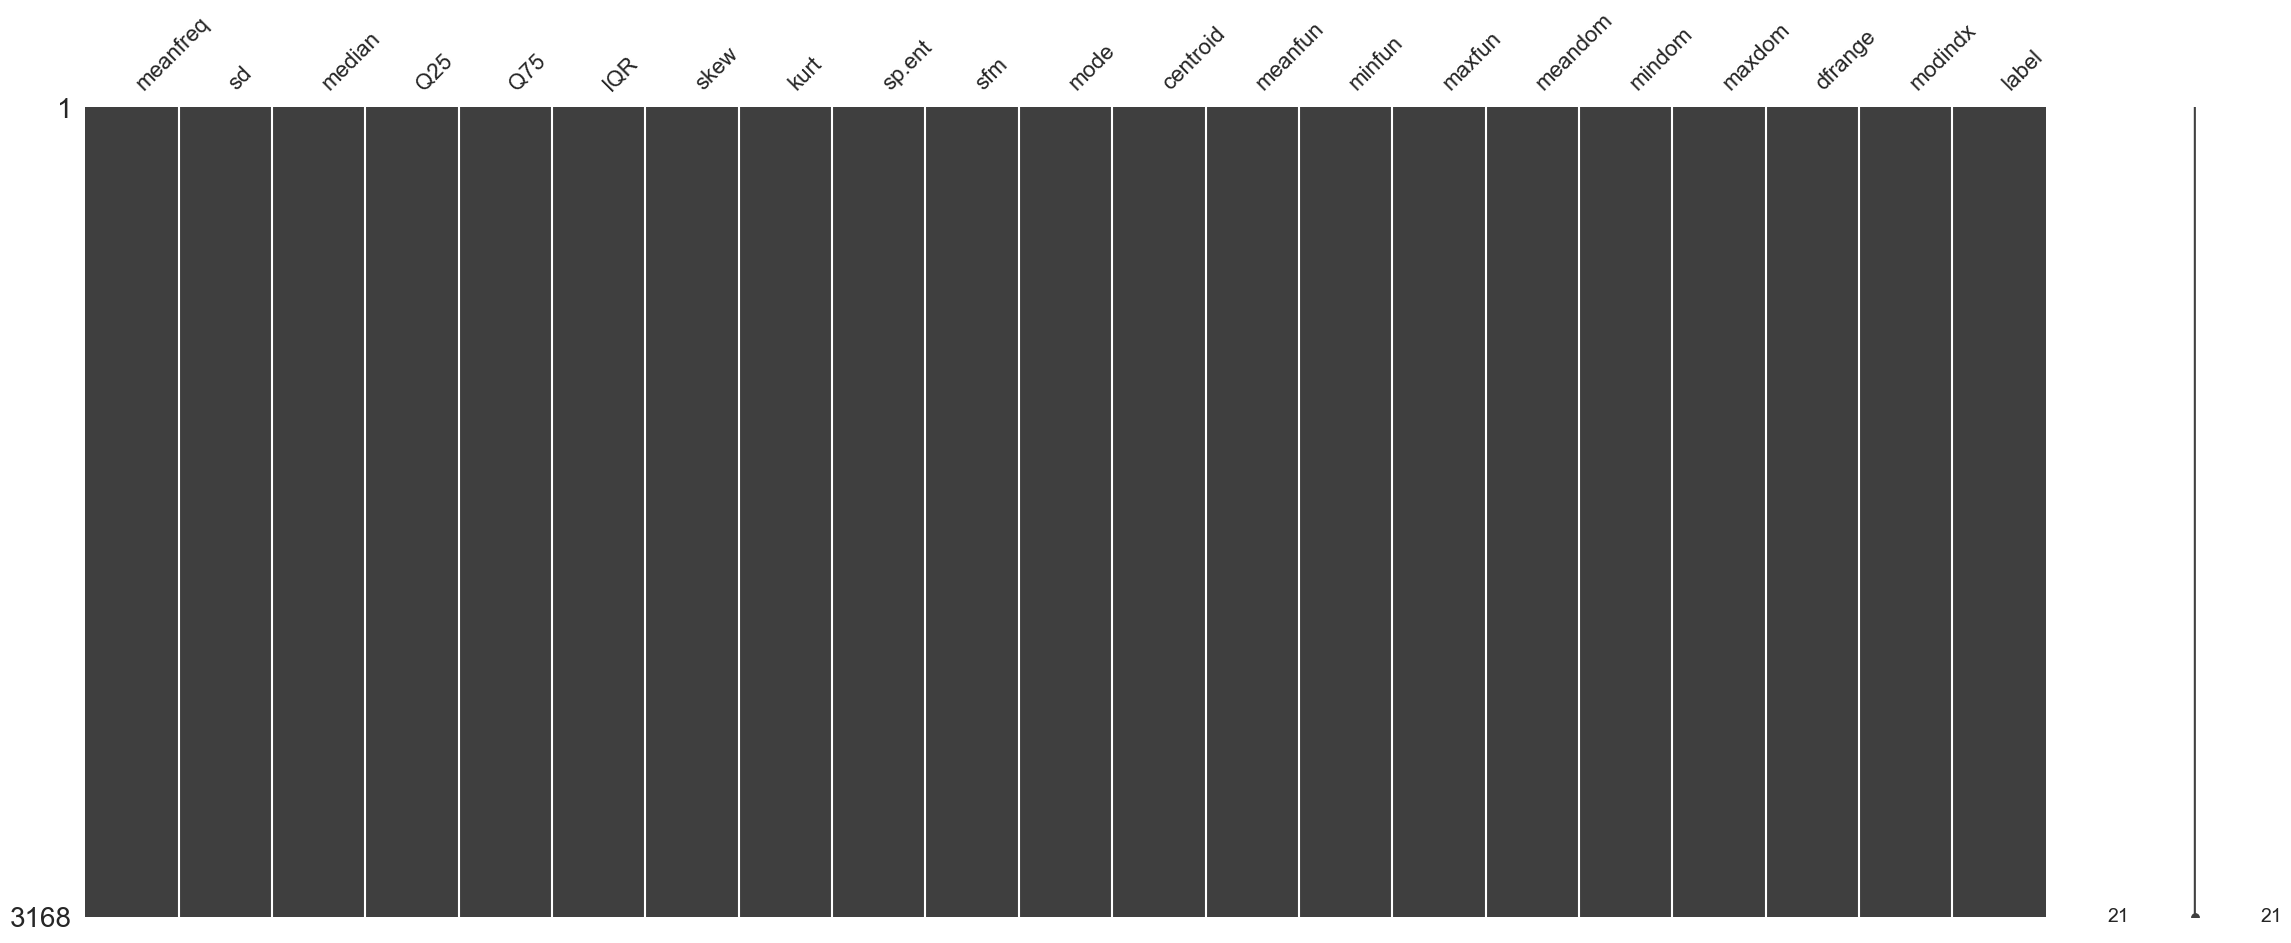

In [9]:
msno.matrix(df)  # just to visualize. no missing value.

### Univariate Analysis

In this section I have performed the univariate analysis. Note that since all of the features are 'numeric' the most reasonable way to plot them would either be a 'histogram' or a 'boxplot'.

Also note that univariate analysis is useful for outlier detection. Hence besides plotting a boxplot and a histogram for each column or feature, I have written a small utility function which tells the remaining no of observations for each feature if  we remove its outliers.

#### To detect the outliers I have used the standard 1.5 InterQuartileRange (IQR) rule which states that any observation lesser than  'first quartile - 1.5 IQR' or greater than 'third quartile +1.5 IQR' is an outlier.

In [10]:
df.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


In [11]:
def calc_limits(feature):
    q1,q3=df[feature].quantile([0.25,0.75])
    iqr=q3-q1
    rang=1.5*iqr
    return(q1-rang,q3+rang)

In [12]:
def plot(feature):
    fig,axes=plt.subplots(1,2)
    sns.boxplot(data=df,x=feature,ax=axes[0])
    sns.distplot(a=df[feature],ax=axes[1],color='#ff4125')
    fig.set_size_inches(15,5)
    
    lower,upper = calc_limits(feature)
    l=[df[feature] for i in df[feature] if i>lower and i<upper] 
    print("Number of data points remaining if outliers removed : ",len(l))



Number of data points remaining if outliers removed :  3104


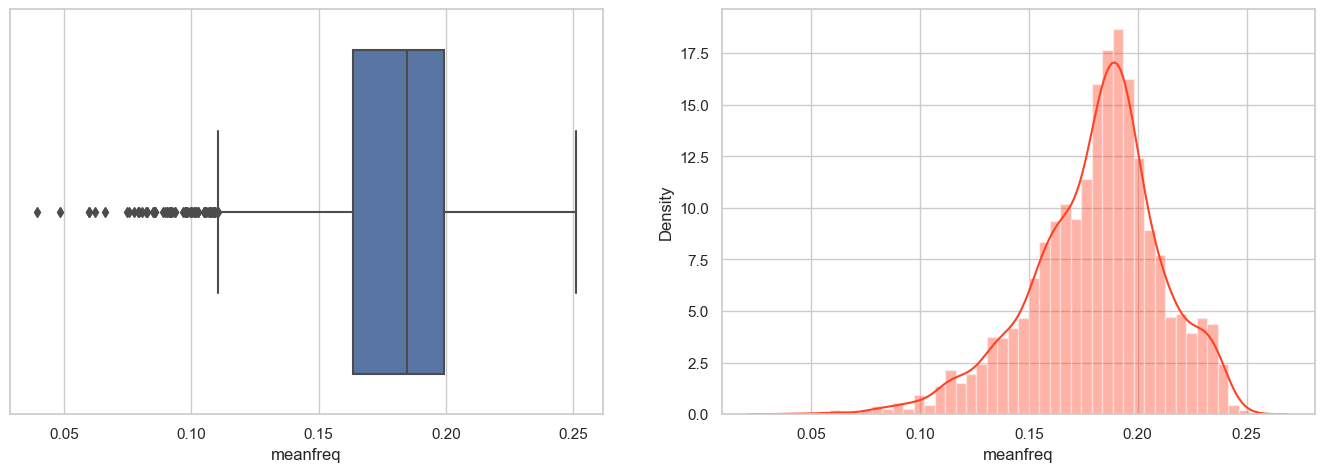

In [13]:
plot('meanfreq')

#### INFERENCES FROM THE PLOT--

1) First of all note that the values are in compliance with that observed from describe method data frame..

2) Note that we have a couple of outliers w.r.t. to 1.5 quartile rule (reprsented by a 'dot' in the box plot).Removing  these data points or outliers leaves us with around 3104 values.

3) Also note from the distplot that the distribution seems to be a bit -ve skewed hence we can normalize to make the distribution a bit more symmetric. 
 
4) LASTLY NOTE THAT A LEFT TAIL DISTRIBUTION HAS MORE OUTLIERS ON THE SIDE BELOW TO Q1 AS EXPECTED AND A RIGHT TAIL HAS ABOVE THE Q3.

#### Similar other plots can be inferenced.

Number of data points remaining if outliers removed :  3158


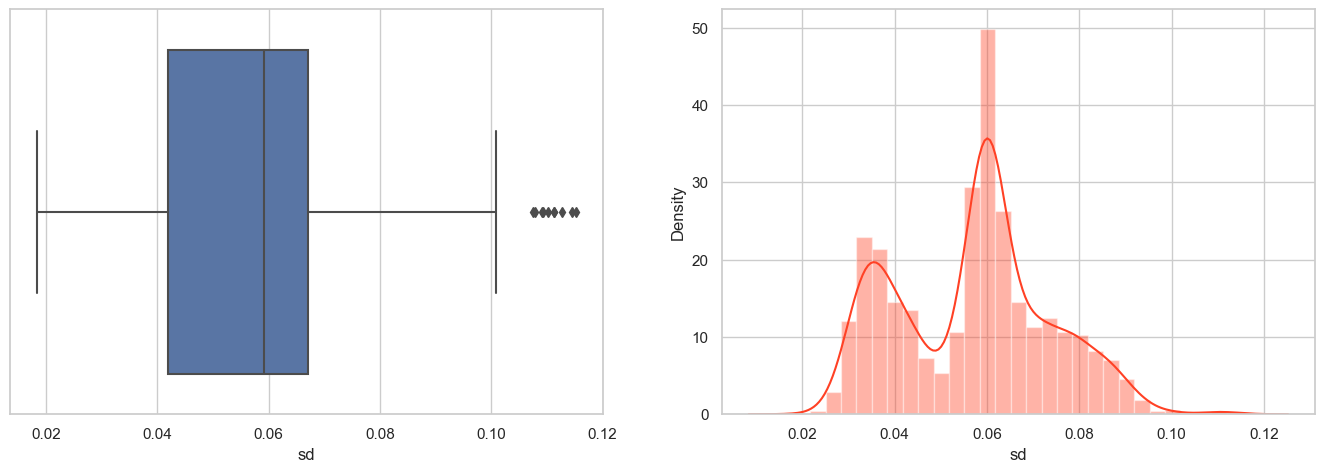

In [14]:
plot('sd')

Number of data points remaining if outliers removed :  3059


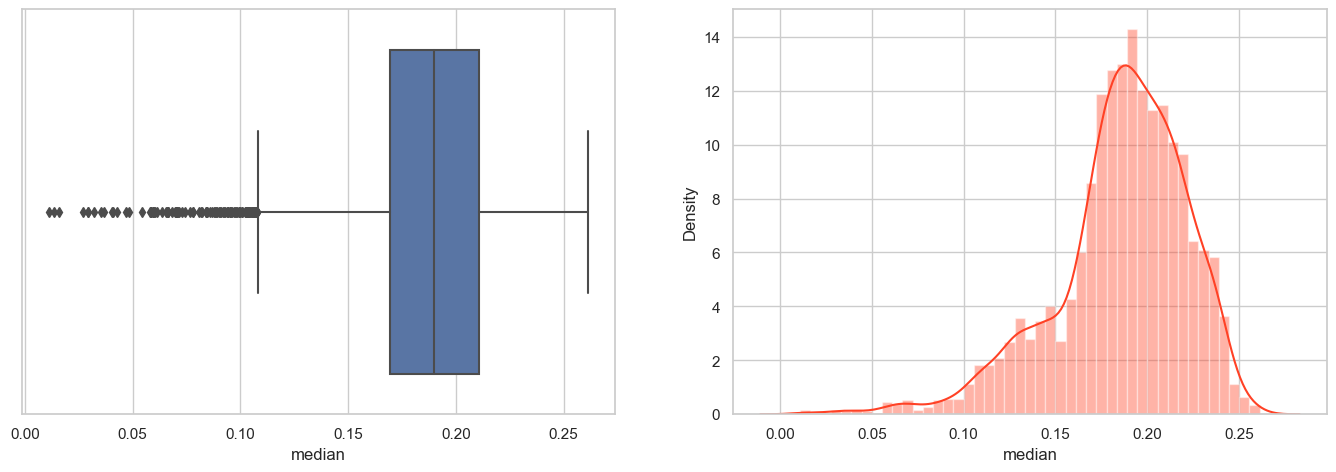

In [15]:
plot('median')

Number of data points remaining if outliers removed :  3135


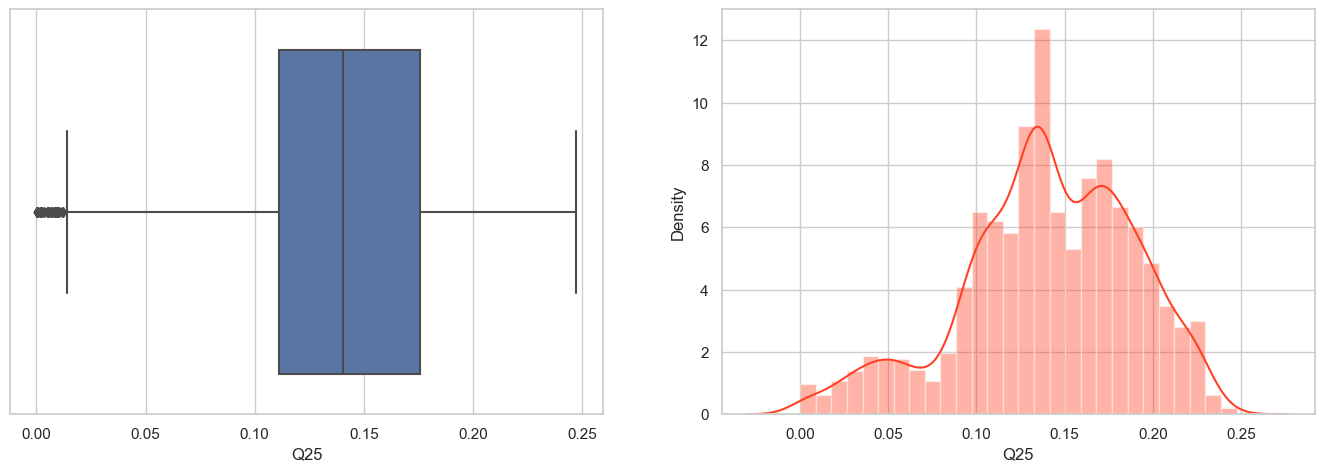

In [16]:
plot('Q25')

Number of data points remaining if outliers removed :  3158


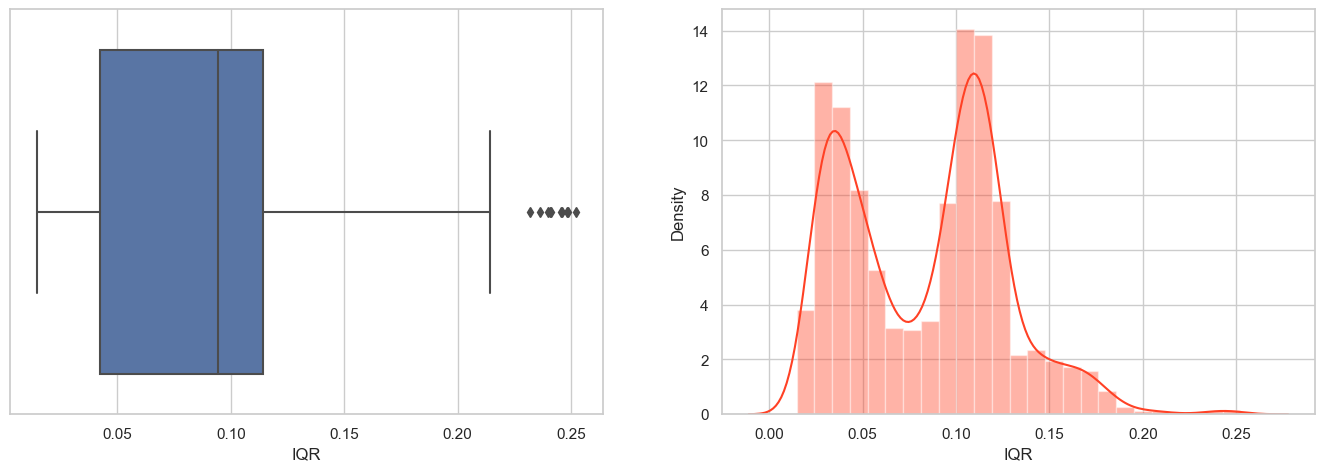

In [17]:
plot('IQR')

Number of data points remaining if outliers removed :  2938


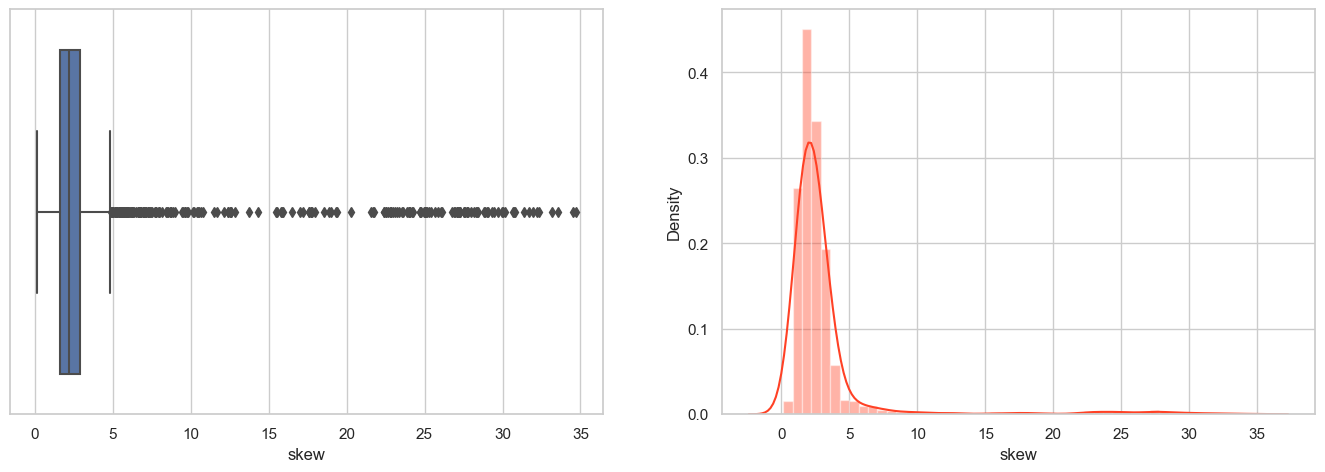

In [18]:
plot('skew')

Number of data points remaining if outliers removed :  2836


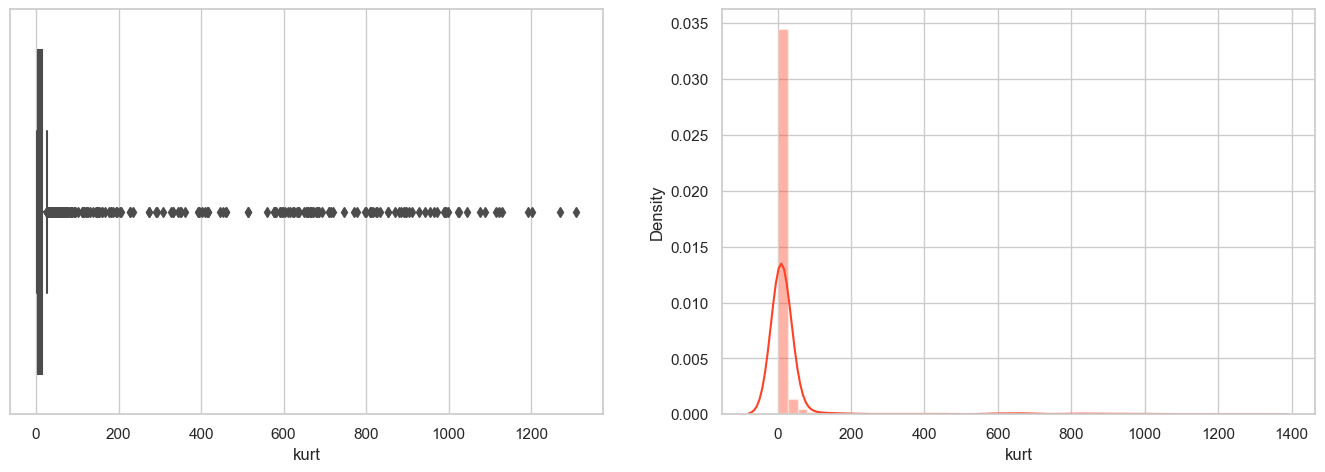

In [19]:
plot('kurt')

Number of data points remaining if outliers removed :  3162


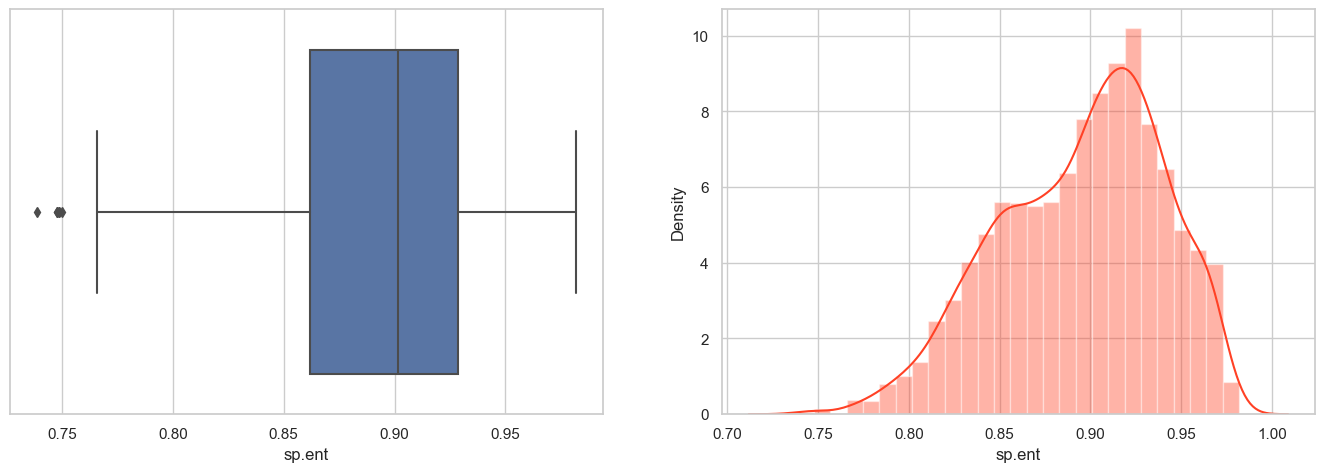

In [20]:
plot('sp.ent')

Number of data points remaining if outliers removed :  3168


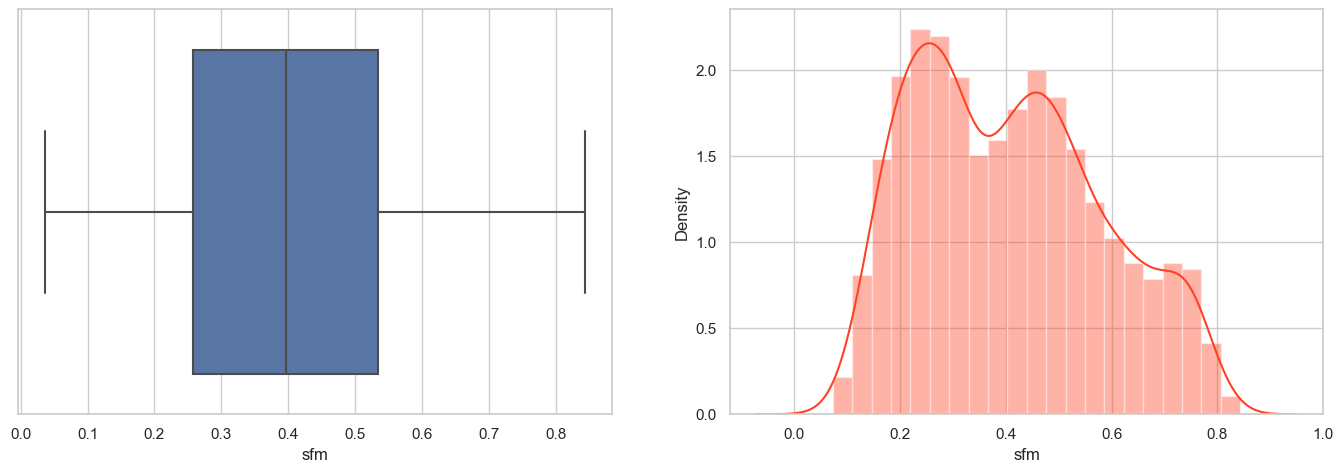

In [21]:
plot('sfm')

Number of data points remaining if outliers removed :  3168


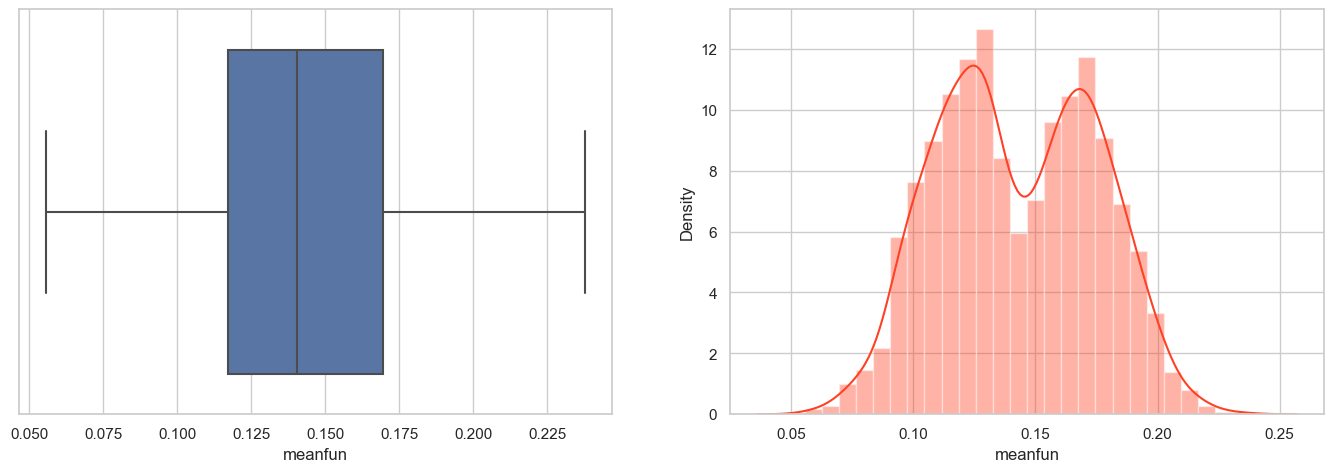

In [22]:
plot('meanfun')

<AxesSubplot:xlabel='label', ylabel='count'>

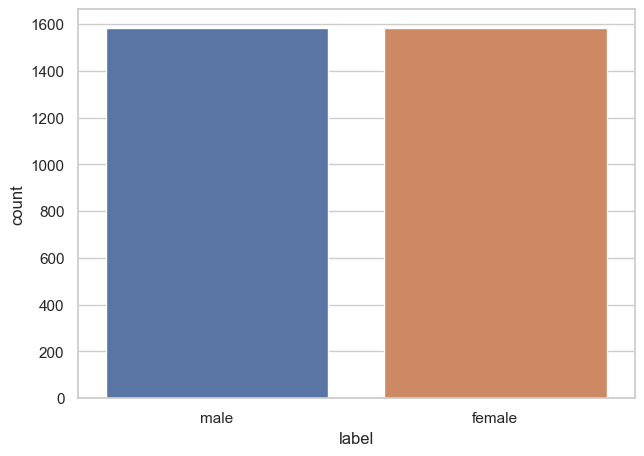

In [23]:
sns.countplot(data=df,x='label')

In [24]:
df['label'].value_counts()

male      1584
female    1584
Name: label, dtype: int64

####  Note that  we have equal no of observations for the 'males' and the 'females'. Hence it is a balanced class problem.

### Bivariate Analysis

**Corealtion b/w Features**

In this section I have analyzed the corelation between different features. To do it I have plotted a 'heat map' which clearly visulizes the corelation between different features.

In [25]:
temp = []
for i in df.label:
    if i == 'male':
        temp.append(1)
    else:
        temp.append(0)
df['label'] = temp

<AxesSubplot:>

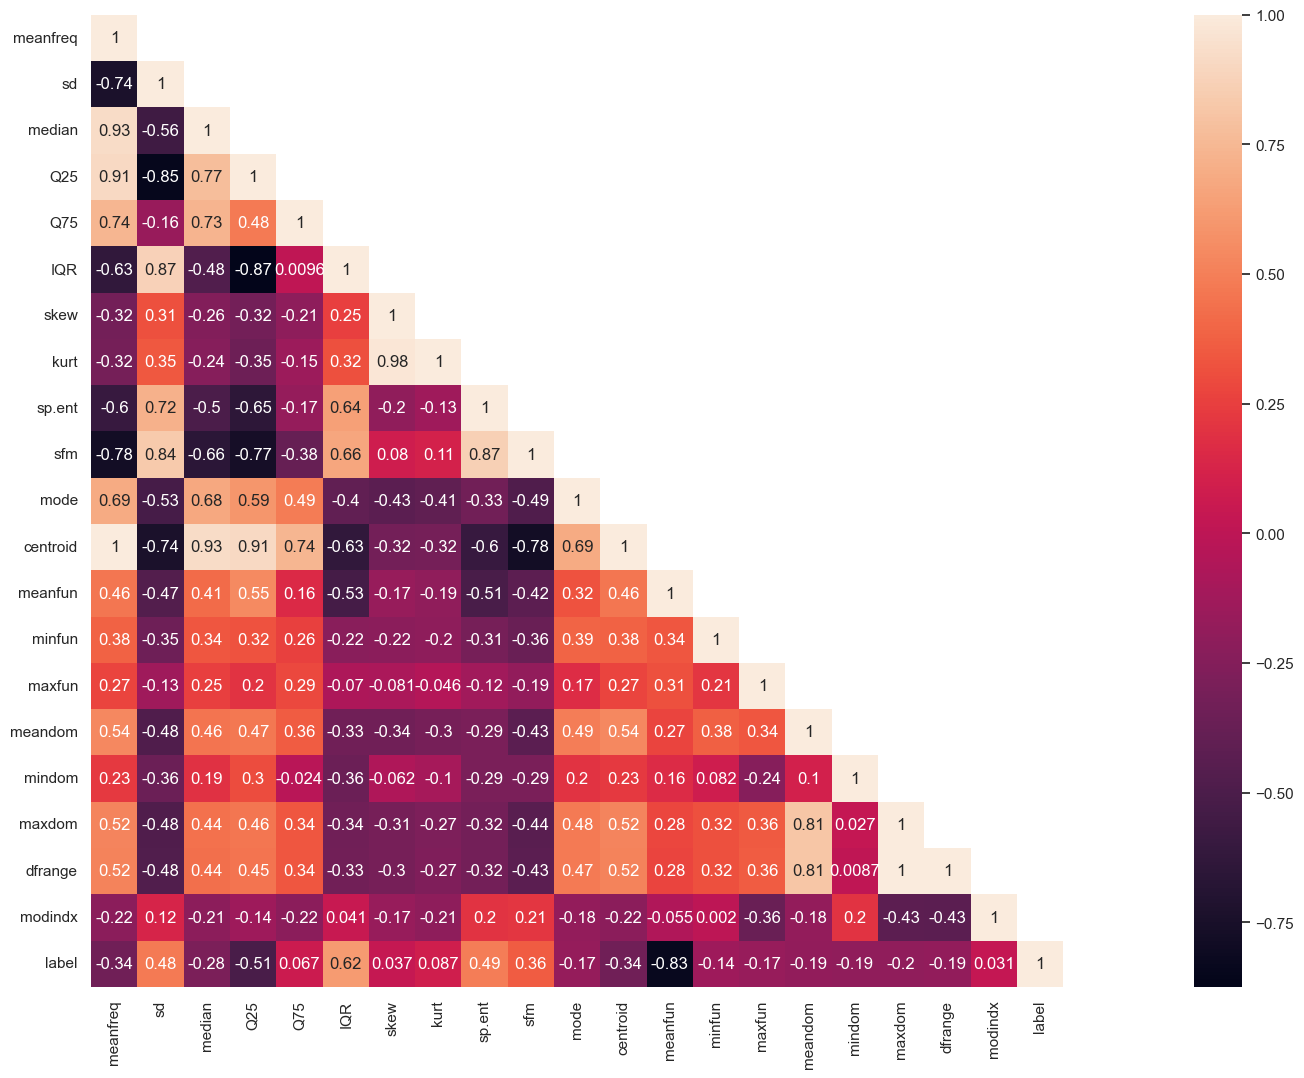

In [26]:
#corelation matrix.
cor_mat= df[:].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

#### SOME INFERENCES FROM THE ABOVE HEATMAP--

1) Mean frequency is  moderately related to label.

2) IQR and label tend to have a strong positive corelation.

3) Spectral entropy is also quite highly corelated with the label while sfm is moderately related with label.

4) skewness and kurtosis aren't much related with label.

5) meanfun is highly negatively corelated with  the label.

6) Centroid and median have a high positive corelationas expected from their formulae.

7) ALSO NOTE THAT MEANFREQ AND CENTROID ARE EXACTLY SAME FEATURES AS PER FORMULAE AND VALUES ALSO. HENCE THEIR CORELATION IS PERFCET 1. IN THAT CASE WE CAN DROP ANY COLUMN. note that centroid in general has a high degree of corelation with most of the other features. 

SO I WILL DROP THE 'CENTROID' COLUMN.

8) sd is highly positively related to sfm and so is sp.ent to sd.

9) kurt and skew are also highly corelated.

10) meanfreq is highly related to medaina s well as Q25.

11) IQR is highly corelated to sd.

12) Finally self relation ie of a feature to itself is equal to 1 as expected.

#### Note that we can drop some highly corelated features as they add redundancy to the model  but  let us keep all the features for now. In case of highly corelated features we can use dimensionality reduction techniques like Principal Component Analysis(PCA) to reduce our feature space.

In [27]:
df.drop('centroid',axis=1,inplace=True)

**Plotting the Features against the 'Target' variable**

Here I have just written a small utility function that plots the 'label' column vs the provided feature on a boxplot. In this way I have plotted some of the features against our target variable. This makes it easier to see the effect of the corressponding feature on the 'label'.

In [28]:
# drawing features against the target variable.

def plot_against_target(feature):
    sns.factorplot(data=df,y=feature,x='label',kind='box')
    fig=plt.gcf()
    fig.set_size_inches(7,7)

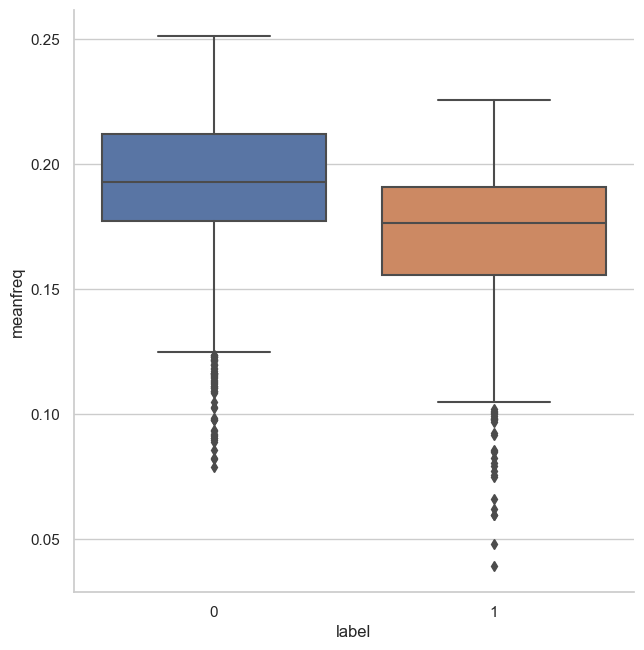

In [29]:
plot_against_target('meanfreq') # 0 for females and 1 for males.

#### INFERENCES--

1) Firstly note that 0->'female' and 1->'male'.

2) Note that the boxpot depicts that the females in genral have higher mean frequencies than their male counterparts and which is a generally accepted fact.

#### Again similar inferences can be drawn.

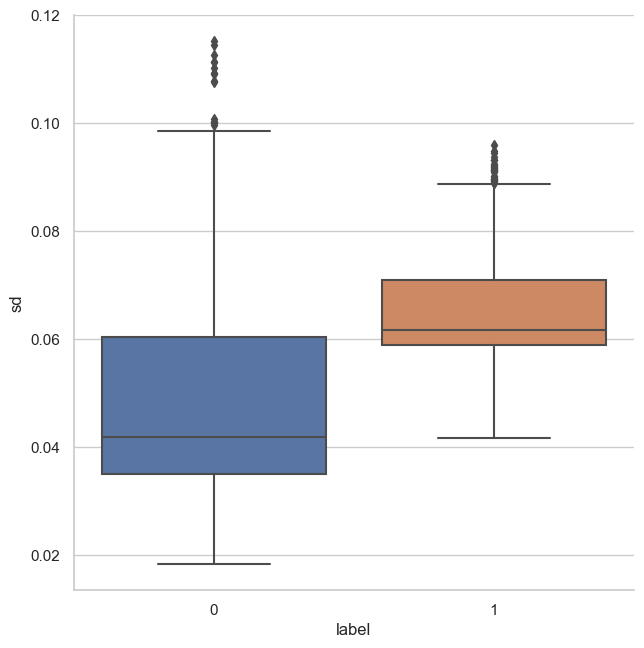

In [30]:
plot_against_target('sd')

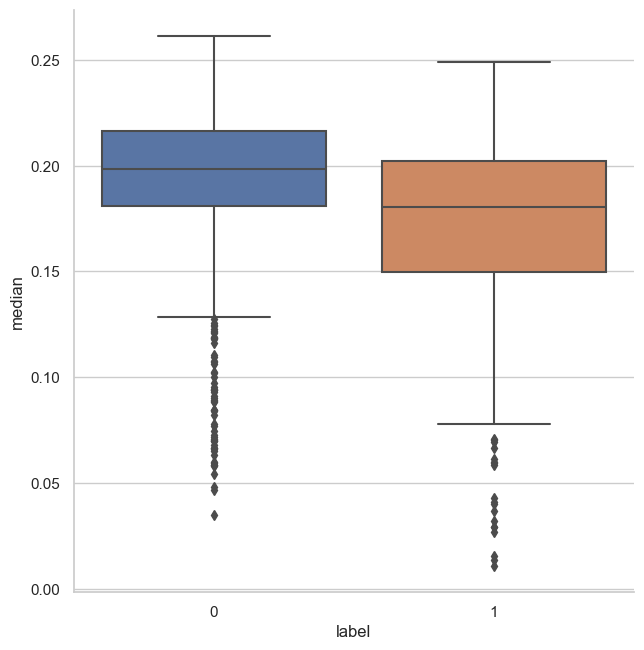

In [31]:
plot_against_target('median')

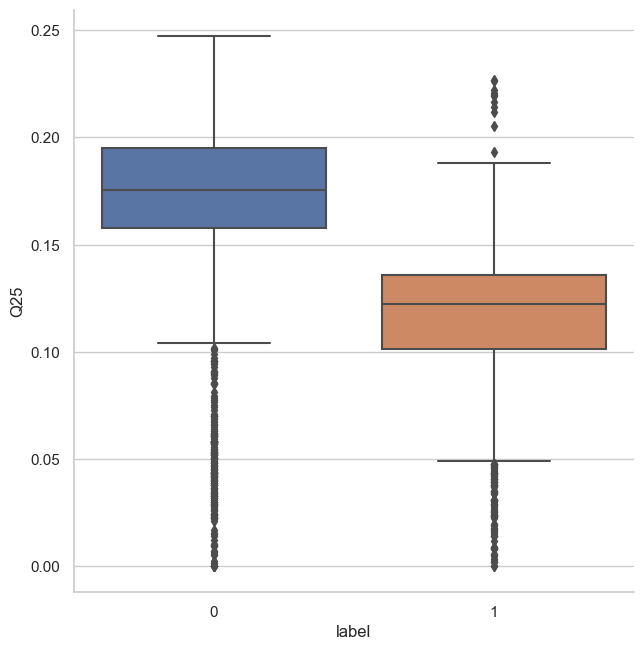

In [32]:
plot_against_target('Q25')

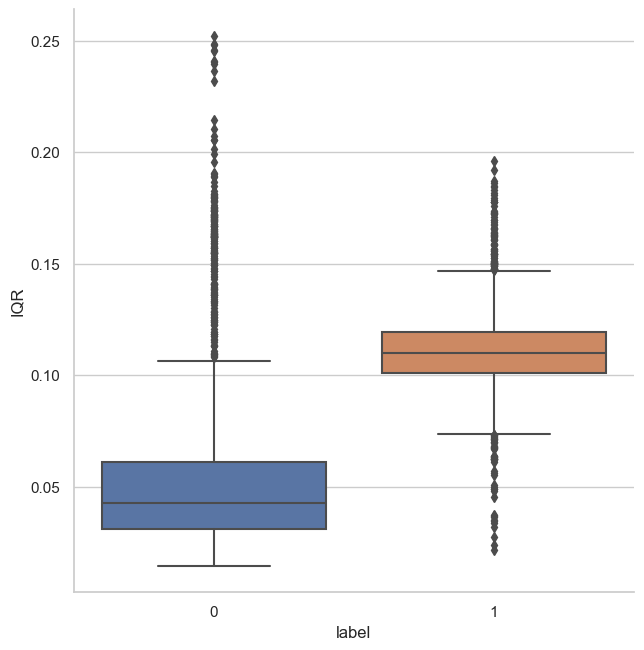

In [33]:
plot_against_target('IQR')

#### Note here that  there is a remarkable difference b/w the inter quartile ranges of males and females.This is evident from the strong relation between 'label' and the 'IQR' in the heatmap plotted above.

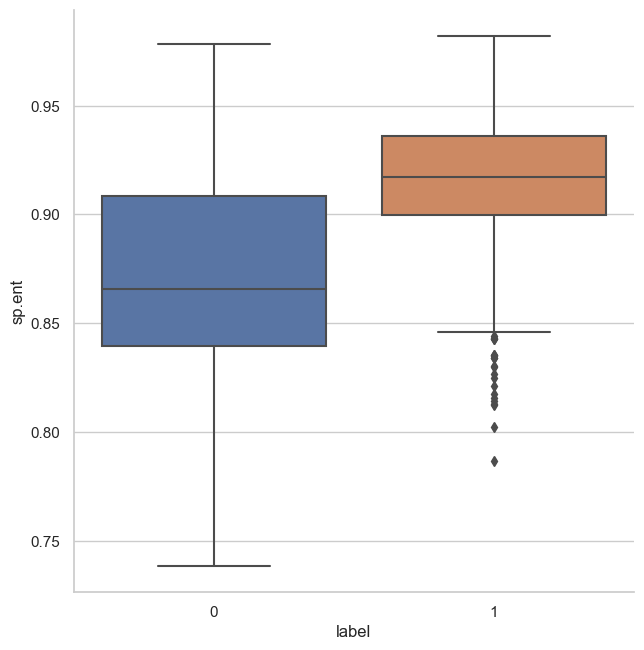

In [34]:
plot_against_target('sp.ent')

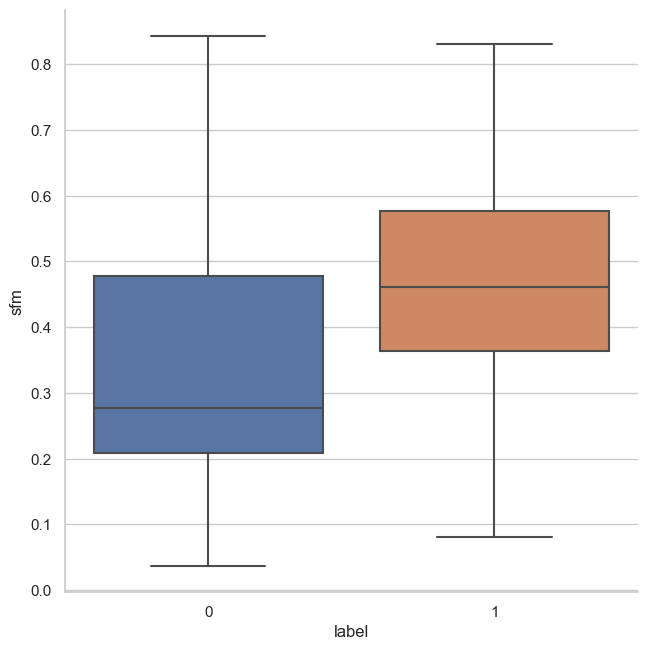

In [35]:
plot_against_target('sfm')

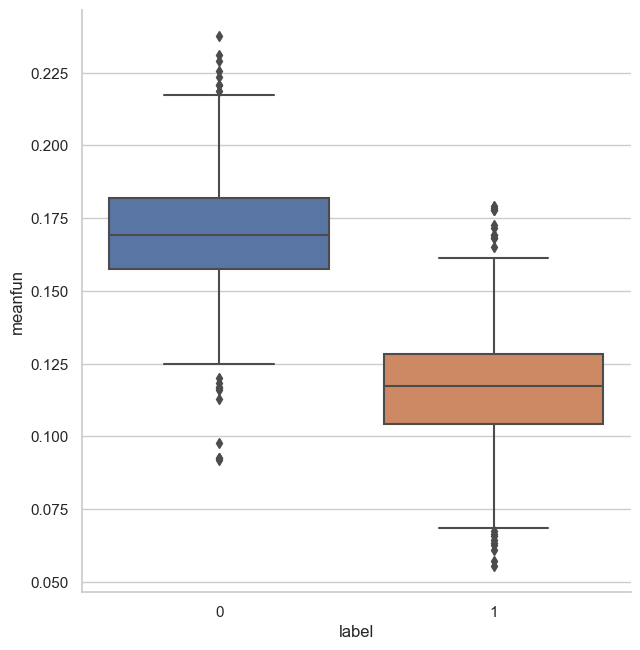

In [36]:
plot_against_target('meanfun')  

#### Again high difference in females and males mean fundamental frequency. This is evident from the heat map which clearly shows the high corelation between meanfun and the 'label'.

#### Now we move onto analyzing different features pairwise. Since all the features are continuous the most reasonable way to do this is plotting the scatter plots for each feature pair. I have also distinguished males and feamles on the same plot which makes it a bit easier to compare the variation of features within the two classes.

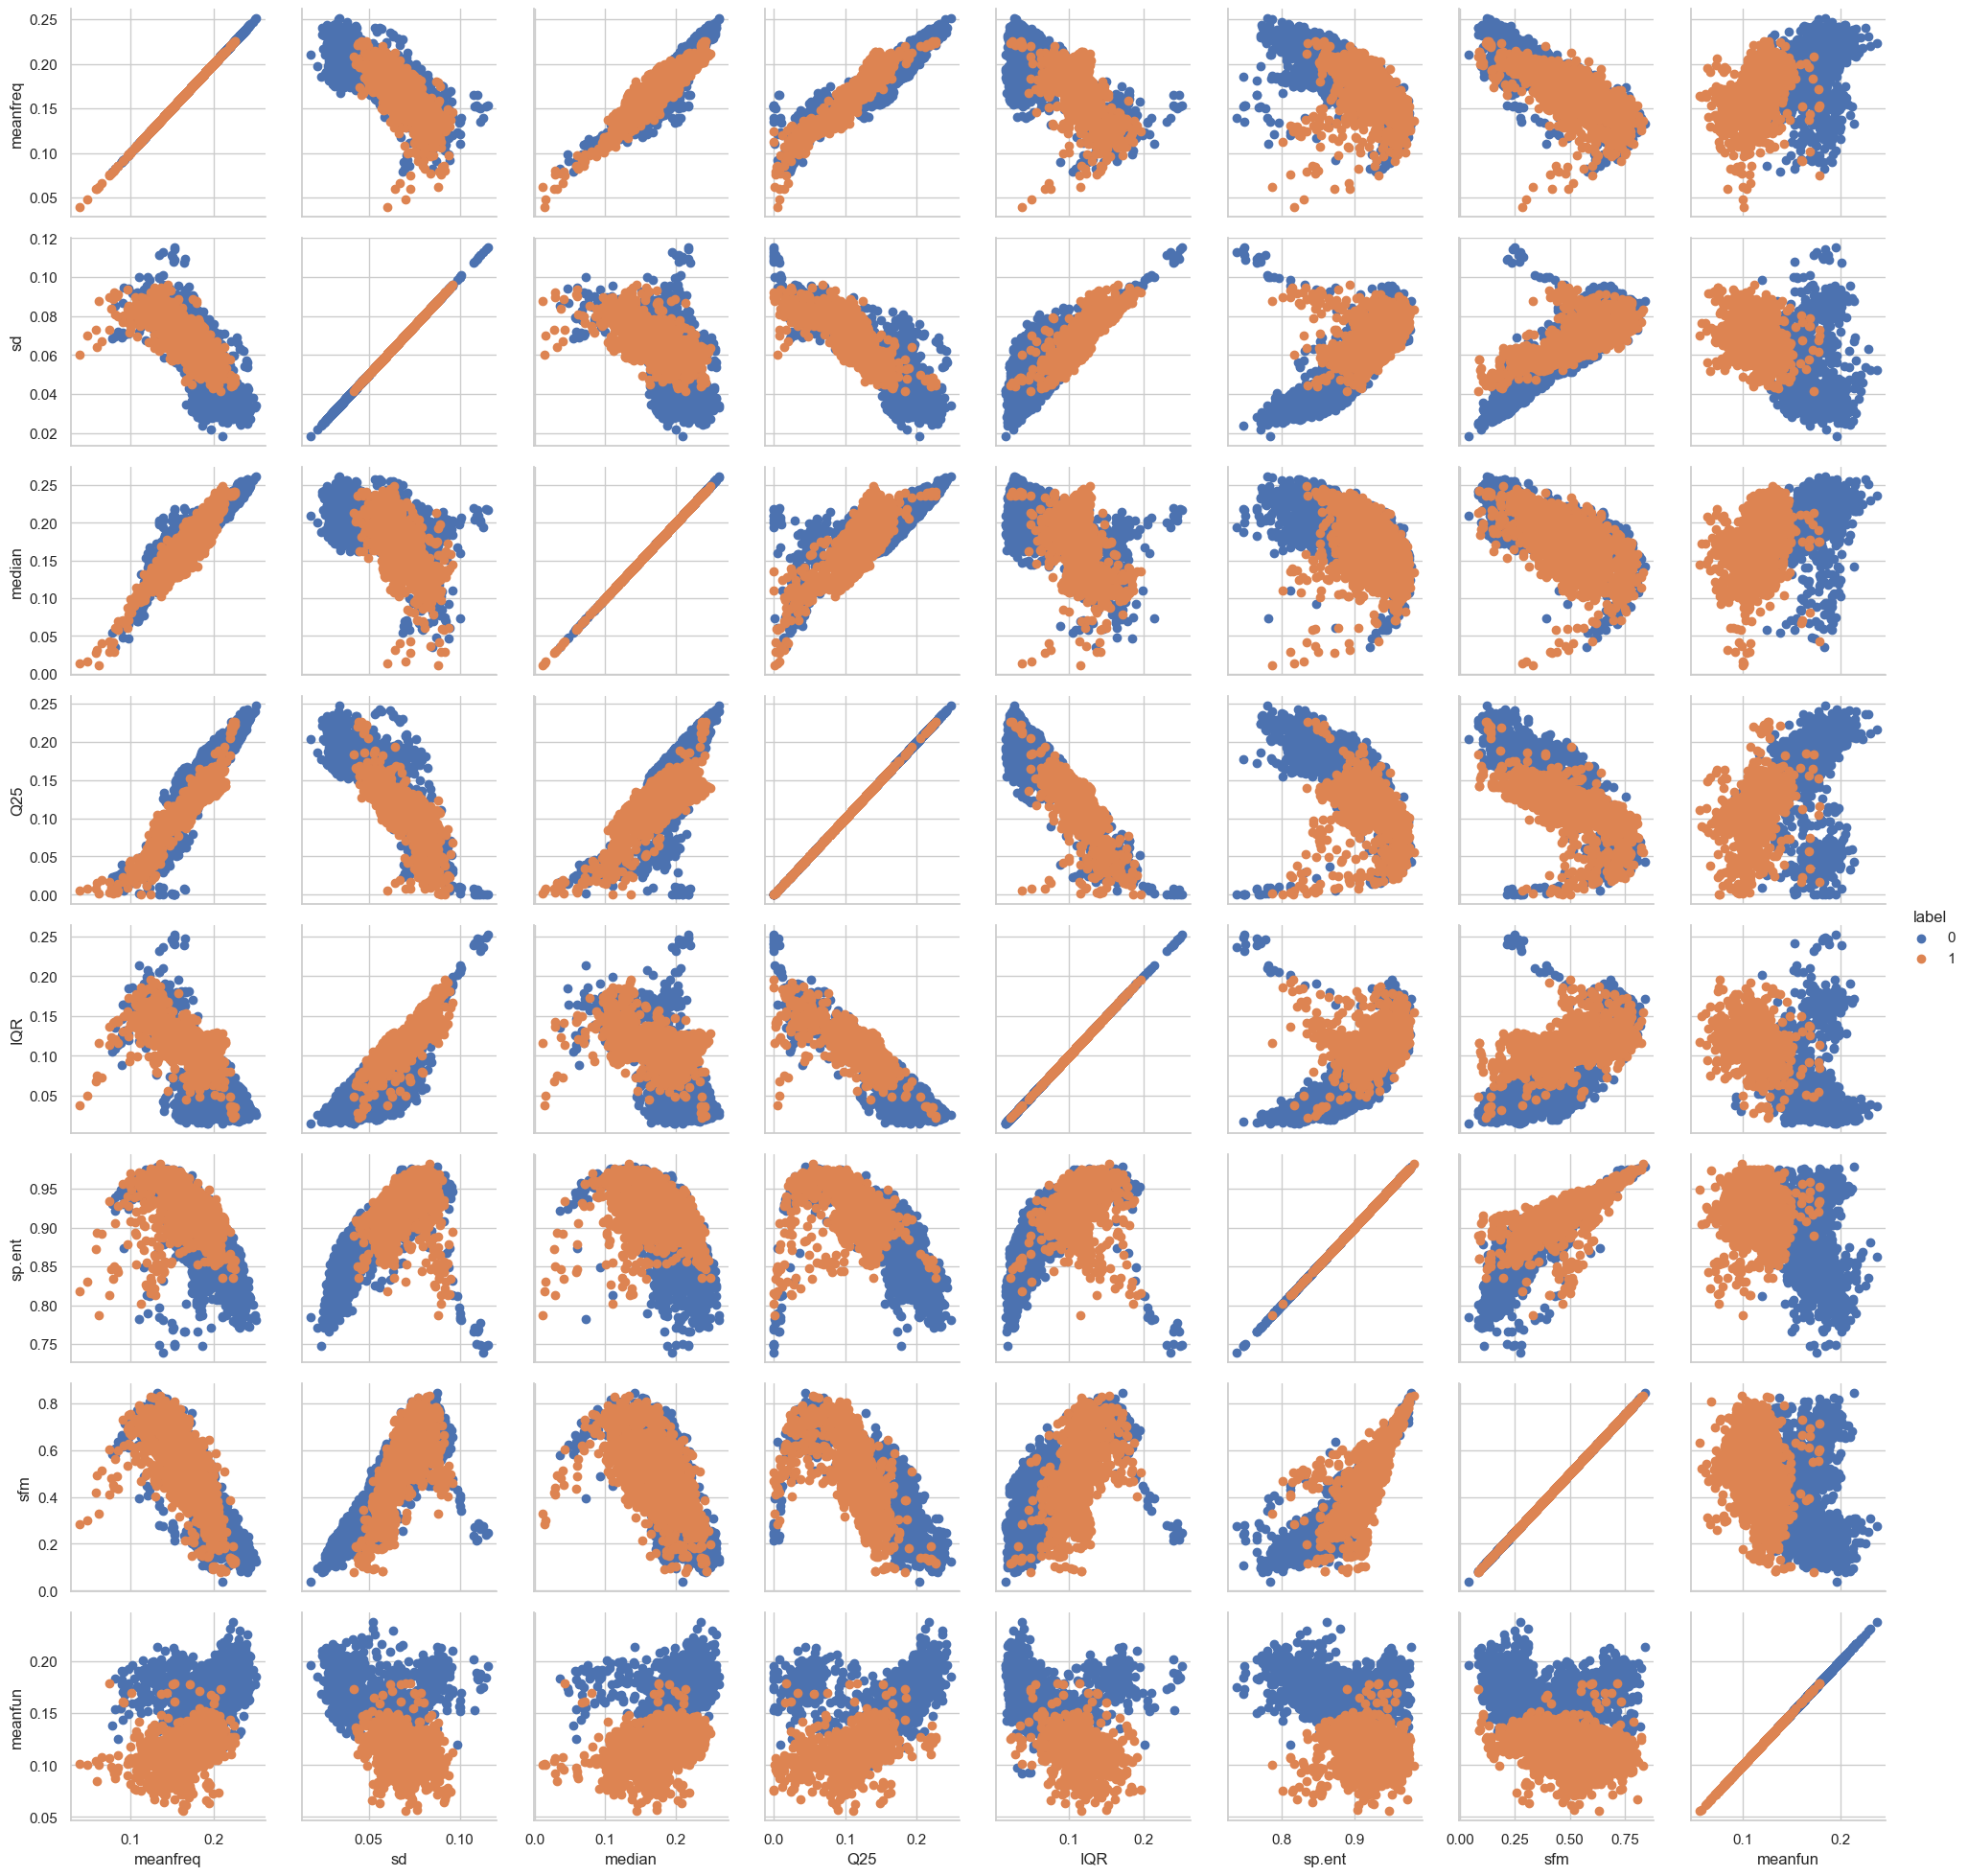

In [37]:
g = sns.PairGrid(df[['meanfreq','sd','median','Q25','IQR','sp.ent','sfm','meanfun','label']], hue = "label")
g = g.map(plt.scatter).add_legend()

<a id="content3"></a>
************************
###  Outlier Treatment

In this section I have dealt with the outliers.  Note that we discovered the potential outliers in the **'univariate analysis' ** section. Now to remove those outliers we can either remove the corressponding data points or impute them with some other statistical quantity like median (robust to outliers) etc..

#### For now I shall be removing all the observations or data points which are outlier to 'any' feature. Note that this substantially reduces the dataset size.

In [38]:
# removal of any data point which is an outlier for any fetaure.
for col in df.columns:
    lower,upper=calc_limits(col)
    df = df[(df[col] >lower) & (df[col]<upper)]

In [39]:
df.shape

(1636, 20)

In [40]:
df.head(10)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1
5,0.132786,0.079557,0.119090,0.067958,0.209592,0.141634,1.932562,8.308895,0.963181,0.738307,0.112555,0.110132,0.017112,0.253968,0.298222,0.007812,2.726562,2.718750,0.125160,1
6,0.150762,0.074463,0.160106,0.092899,0.205718,0.112819,1.530643,5.987498,0.967573,0.762638,0.086197,0.105945,0.026230,0.266667,0.479620,0.007812,5.312500,5.304688,0.123992,1
8,0.142239,0.078018,0.138587,0.088206,0.208587,0.120381,1.099746,4.070284,0.970723,0.770992,0.219103,0.096729,0.017957,0.250000,0.336476,0.007812,2.164062,2.156250,0.148272,1
16,0.190846,0.065790,0.207951,0.132280,0.244357,0.112076,1.562304,7.834350,0.938546,0.538810,0.050129,0.113323,0.017544,0.275862,1.434115,0.007812,6.320312,6.312500,0.254780,1
18,0.168346,0.074121,0.145618,0.115756,0.239824,0.124068,2.704335,18.484703,0.934523,0.559742,0.060033,0.083484,0.015717,0.231884,0.146563,0.007812,3.125000,3.117188,0.059537,1
21,0.181015,0.074369,0.169299,0.128673,0.254175,0.125502,2.587325,12.281432,0.915284,0.475317,0.059957,0.098643,0.016145,0.275862,0.209844,0.007812,3.695312,3.687500,0.059940,1
32,0.175659,0.071652,0.144192,0.131058,0.256527,0.125469,3.736487,21.666669,0.876749,0.403910,0.134411,0.132726,0.016563,0.228571,0.257812,0.007812,0.648438,0.640625,0.203437,1
33,0.174826,0.071533,0.146471,0.123529,0.247059,0.123529,2.576732,10.110125,0.875392,0.436706,0.120000,0.124685,0.016754,0.250000,0.799006,0.007812,4.171875,4.164062,0.205816,1


<a id="content4"></a>
****************
### Feature Engineering.

**Dropping the features**

I have dropped some columns which according to my analysis proved to be less useful or redundant.

In [41]:
temp_df=df.copy()

temp_df.drop(['skew','kurt','mindom','maxdom'],axis=1,inplace=True) # only one of maxdom and dfrange.
temp_df.head(10)
#df.head(10)

,meanfreq,sd,median,Q25,Q75,IQR,sp.ent,sfm,mode,meanfun,minfun,maxfun,meandom,dfrange,modindx,label
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,0.963322,0.727232,0.083878,0.088965,0.017798,0.250000,0.201497,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,0.971955,0.783568,0.104261,0.106398,0.016931,0.266667,0.712812,5.476562,0.208274,1
5,0.132786,0.079557,0.119090,0.067958,0.209592,0.141634,0.963181,0.738307,0.112555,0.110132,0.017112,0.253968,0.298222,2.718750,0.125160,1
6,0.150762,0.074463,0.160106,0.092899,0.205718,0.112819,0.967573,0.762638,0.086197,0.105945,0.026230,0.266667,0.479620,5.304688,0.123992,1
8,0.142239,0.078018,0.138587,0.088206,0.208587,0.120381,0.970723,0.770992,0.219103,0.096729,0.017957,0.250000,0.336476,2.156250,0.148272,1
16,0.190846,0.065790,0.207951,0.132280,0.244357,0.112076,0.938546,0.538810,0.050129,0.113323,0.017544,0.275862,1.434115,6.312500,0.254780,1
18,0.168346,0.074121,0.145618,0.115756,0.239824,0.124068,0.934523,0.559742,0.060033,0.083484,0.015717,0.231884,0.146563,3.117188,0.059537,1
21,0.181015,0.074369,0.169299,0.128673,0.254175,0.125502,0.915284,0.475317,0.059957,0.098643,0.016145,0.275862,0.209844,3.687500,0.059940,1
32,0.175659,0.071652,0.144192,0.131058,0.256527,0.125469,0.876749,0.403910,0.134411,0.132726,0.016563,0.228571,0.257812,0.640625,0.203437,1
33,0.174826,0.071533,0.146471,0.123529,0.247059,0.123529,0.875392,0.436706,0.120000,0.124685,0.016754,0.250000,0.799006,4.164062,0.205816,1


**Creating new features**

I have done two new things. Firstly I have made 'meanfreq','median' and 'mode' to comply by the standard relation->

####     ......................................................................................3*Median=2*Mean +Mode.........................................................................

####  For this I have adjusted values in the 'median' column as shown below. You can alter values in any of the other column say the 'meanfreq' column.

In [42]:
temp_df['meanfreq']=temp_df['meanfreq'].apply(lambda x:x*2)
temp_df['median']=temp_df['meanfreq']+temp_df['mode']
temp_df['median']=temp_df['median'].apply(lambda x:x/3)

In [43]:
temp_df.head(10) 

,meanfreq,sd,median,Q25,Q75,IQR,sp.ent,sfm,mode,meanfun,minfun,maxfun,meandom,dfrange,modindx,label
3,0.302456,0.072111,0.128778,0.096582,0.207955,0.111374,0.963322,0.727232,0.083878,0.088965,0.017798,0.250000,0.201497,0.554688,0.247119,1
4,0.270241,0.079146,0.124834,0.078720,0.206045,0.127325,0.971955,0.783568,0.104261,0.106398,0.016931,0.266667,0.712812,5.476562,0.208274,1
5,0.265573,0.079557,0.126043,0.067958,0.209592,0.141634,0.963181,0.738307,0.112555,0.110132,0.017112,0.253968,0.298222,2.718750,0.125160,1
6,0.301525,0.074463,0.129240,0.092899,0.205718,0.112819,0.967573,0.762638,0.086197,0.105945,0.026230,0.266667,0.479620,5.304688,0.123992,1
8,0.284479,0.078018,0.167861,0.088206,0.208587,0.120381,0.970723,0.770992,0.219103,0.096729,0.017957,0.250000,0.336476,2.156250,0.148272,1
16,0.381693,0.065790,0.143941,0.132280,0.244357,0.112076,0.938546,0.538810,0.050129,0.113323,0.017544,0.275862,1.434115,6.312500,0.254780,1
18,0.336692,0.074121,0.132242,0.115756,0.239824,0.124068,0.934523,0.559742,0.060033,0.083484,0.015717,0.231884,0.146563,3.117188,0.059537,1
21,0.362031,0.074369,0.140663,0.128673,0.254175,0.125502,0.915284,0.475317,0.059957,0.098643,0.016145,0.275862,0.209844,3.687500,0.059940,1
32,0.351319,0.071652,0.161910,0.131058,0.256527,0.125469,0.876749,0.403910,0.134411,0.132726,0.016563,0.228571,0.257812,0.640625,0.203437,1
33,0.349651,0.071533,0.156550,0.123529,0.247059,0.123529,0.875392,0.436706,0.120000,0.124685,0.016754,0.250000,0.799006,4.164062,0.205816,1


<AxesSubplot:xlabel='label', ylabel='median'>

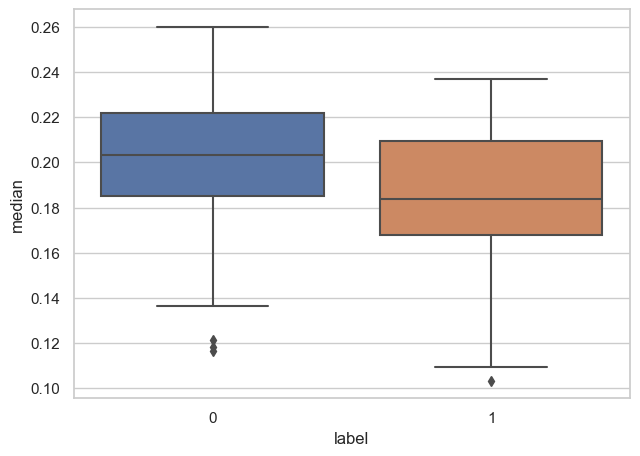

In [44]:
sns.boxplot(data=temp_df,y='median',x='label') # seeing the new 'median' against the 'label'.

The second new feature that I have added is  a new feature to mesure the 'skewness'. 

#### For this I have used the 'Karl Pearson Coefficent' which is calculated as shown below->

**..........................................................Coefficent = (Mean - Mode )/StandardDeviation......................................................**

**You can also try some other coefficient also and see how it comapres with the target i.e. the 'label' column.**

In [45]:
temp_df['pear_skew']=temp_df['meanfreq']-temp_df['mode']
temp_df['pear_skew']=temp_df['pear_skew']/temp_df['sd']
temp_df.head(10)

,meanfreq,sd,median,Q25,Q75,IQR,sp.ent,sfm,mode,meanfun,minfun,maxfun,meandom,dfrange,modindx,label,pear_skew
3,0.302456,0.072111,0.128778,0.096582,0.207955,0.111374,0.963322,0.727232,0.083878,0.088965,0.017798,0.250000,0.201497,0.554688,0.247119,1,3.031150
4,0.270241,0.079146,0.124834,0.078720,0.206045,0.127325,0.971955,0.783568,0.104261,0.106398,0.016931,0.266667,0.712812,5.476562,0.208274,1,2.097126
5,0.265573,0.079557,0.126043,0.067958,0.209592,0.141634,0.963181,0.738307,0.112555,0.110132,0.017112,0.253968,0.298222,2.718750,0.125160,1,1.923371
6,0.301525,0.074463,0.129240,0.092899,0.205718,0.112819,0.967573,0.762638,0.086197,0.105945,0.026230,0.266667,0.479620,5.304688,0.123992,1,2.891735
8,0.284479,0.078018,0.167861,0.088206,0.208587,0.120381,0.970723,0.770992,0.219103,0.096729,0.017957,0.250000,0.336476,2.156250,0.148272,1,0.837952
16,0.381693,0.065790,0.143941,0.132280,0.244357,0.112076,0.938546,0.538810,0.050129,0.113323,0.017544,0.275862,1.434115,6.312500,0.254780,1,5.039700
18,0.336692,0.074121,0.132242,0.115756,0.239824,0.124068,0.934523,0.559742,0.060033,0.083484,0.015717,0.231884,0.146563,3.117188,0.059537,1,3.732540
21,0.362031,0.074369,0.140663,0.128673,0.254175,0.125502,0.915284,0.475317,0.059957,0.098643,0.016145,0.275862,0.209844,3.687500,0.059940,1,4.061809
32,0.351319,0.071652,0.161910,0.131058,0.256527,0.125469,0.876749,0.403910,0.134411,0.132726,0.016563,0.228571,0.257812,0.640625,0.203437,1,3.027258
33,0.349651,0.071533,0.156550,0.123529,0.247059,0.123529,0.875392,0.436706,0.120000,0.124685,0.016754,0.250000,0.799006,4.164062,0.205816,1,3.210434


<AxesSubplot:xlabel='label', ylabel='pear_skew'>

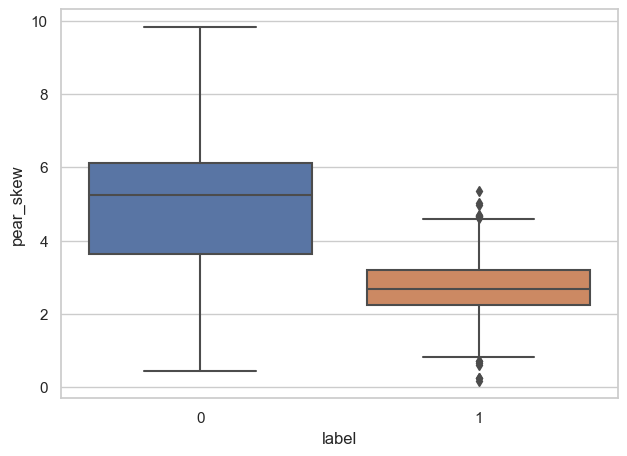

In [46]:
sns.boxplot(data=temp_df,y='pear_skew',x='label') # plotting new 'skewness' against the 'label'.

<a id="content5"></a>
***************
### Preparing the Data

**Normalizing the Features.**

In [47]:
scaler=StandardScaler()
scaled_df=scaler.fit_transform(temp_df.drop('label',axis=1))
X=scaled_df
Y=df['label'].to_numpy()


**Splitting into Training and Validation sets.**

In [48]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=42)

## Build Classification Models

### Logistic Regression 


In [49]:
clf_lr=LogisticRegression()
clf_lr.fit(x_train,y_train)
pred=clf_lr.predict(x_test)
print(accuracy_score(pred,y_test))

0.9817073170731707


### K-Nearest Neighbours Algorithm

In [50]:
clf_knn=KNeighborsClassifier()
clf_knn.fit(x_train,y_train)
pred=clf_knn.predict(x_test)
print(accuracy_score(pred,y_test))

0.9817073170731707


### Support Vector Machine Algorithm

In [51]:
clf_svm=SVC()
clf_svm.fit(x_train,y_train)
pred=clf_svm.predict(x_test)
print(accuracy_score(pred,y_test))

0.9908536585365854


### Decision Tree Classifier Algorithm

In [52]:
clf_dt=DecisionTreeClassifier()
clf_dt.fit(x_train,y_train)
pred=clf_dt.predict(x_test)
print(accuracy_score(pred,y_test))

0.9451219512195121


### Random Forest Classifier Algorithm

In [53]:
clf_rf=RandomForestClassifier()
clf_rf.fit(x_train,y_train)
pred=clf_rf.predict(x_test)
print(accuracy_score(pred,y_test))

0.9817073170731707


### Gradient Boosting

In [54]:
clf_gb=GradientBoostingClassifier()
clf_gb.fit(x_train,y_train)
pred=clf_gb.predict(x_test)
print(accuracy_score(pred,y_test))

0.9786585365853658


#### Compare models and select the best

In [55]:
models=[LogisticRegression(), LinearSVC(), SVC(kernel='rbf'), KNeighborsClassifier(), RandomForestClassifier(),
        DecisionTreeClassifier(),GradientBoostingClassifier(),GaussianNB()]
model_names=['LogisticRegression','LinearSVM','rbfSVM','KNearestNeighbors','RandomForestClassifier','DecisionTree',
             'GradientBoostingClassifier','GaussianNB']

acc=[]
d={}

for model in range(len(models)):
    clf=models[model]
    clf.fit(x_train,y_train)
    pred=clf.predict(x_test)
    acc.append(accuracy_score(pred,y_test))
     
d={'Modelling Algo':model_names,'Accuracy':acc}

In [56]:
acc_frame=pd.DataFrame(d)
acc_frame

,Modelling Algo,Accuracy
0,LogisticRegression,0.981707
1,LinearSVM,0.984756
2,rbfSVM,0.990854
3,KNearestNeighbors,0.981707
4,RandomForestClassifier,0.978659
5,DecisionTree,0.954268
6,GradientBoostingClassifier,0.975610
7,GaussianNB,0.966463


<AxesSubplot:xlabel='Accuracy', ylabel='Modelling Algo'>

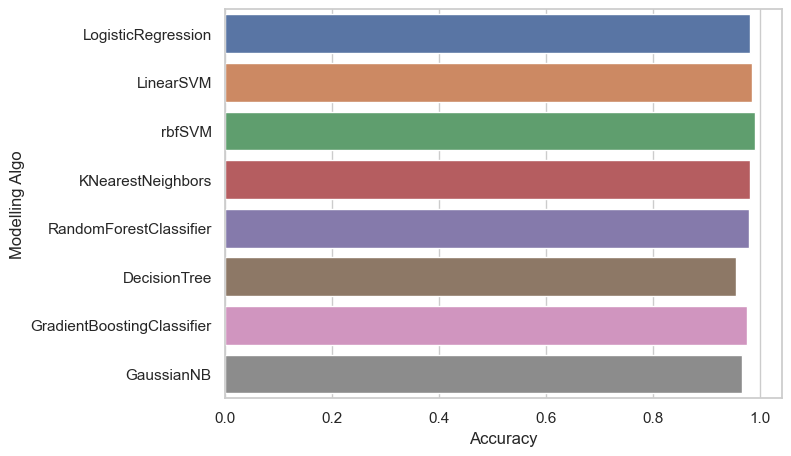

In [57]:
sns.barplot(y='Modelling Algo',x='Accuracy',data=acc_frame)

<a id="content7"></a>
**********************
### Parameter Tuning with GridSearchCV

I have tuned only SVM Similarly other algorithms can be tuned.

In [58]:
params_dict={'C':[0.001,0.01,0.1,1,10,100],
             'gamma':[0.001,0.01,0.1,1,10,100],
             'kernel':['linear','rbf']}
clf=GridSearchCV(estimator=SVC(),param_grid=params_dict,scoring='accuracy',cv=10)
clf.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [59]:
clf.best_score_

0.9824192601291838

In [60]:
clf.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [61]:
print( accuracy_score(clf.predict(x_test),y_test) )

0.9908536585365854


In [62]:
print( precision_score(clf.predict(x_test),y_test) )

0.9946236559139785
